In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [12]:
import tensorflow as tf

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Now you can proceed to define and train your model



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the feature maps and add fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
from tensorflow.keras.datasets import mnist  # or another dataset

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [16]:
from tensorflow.keras.datasets import mnist  # or another dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and prepare the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define a simple model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Print final accuracy
print(f"Training accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8800 - loss: 0.4293 - val_accuracy: 0.9565 - val_loss: 0.1458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9654 - loss: 0.1222 - val_accuracy: 0.9708 - val_loss: 0.0996
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9756 - loss: 0.0808 - val_accuracy: 0.9722 - val_loss: 0.0888
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9774 - val_loss: 0.0722
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9877 - loss: 0.0420 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9907 - loss: 0.0325 - val_accuracy: 0.9771 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9761 - val_loss: 0.0818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0214 

In [17]:
# Load or define the test_images and test_labels
# For example:
# test_images, test_labels = load_your_data_function()

# Ensure that test_labels is defined before the assertion
assert 'test_labels' in globals(), "test_labels is not defined."

# Validate labels
num_classes = 10  # Update this if you have a different number of classes
assert all(label < num_classes for label in test_labels), "Found label outside the valid range."

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 0s - 1ms/step - accuracy: 0.9770 - loss: 0.0872

Test accuracy: 0.9769999980926514


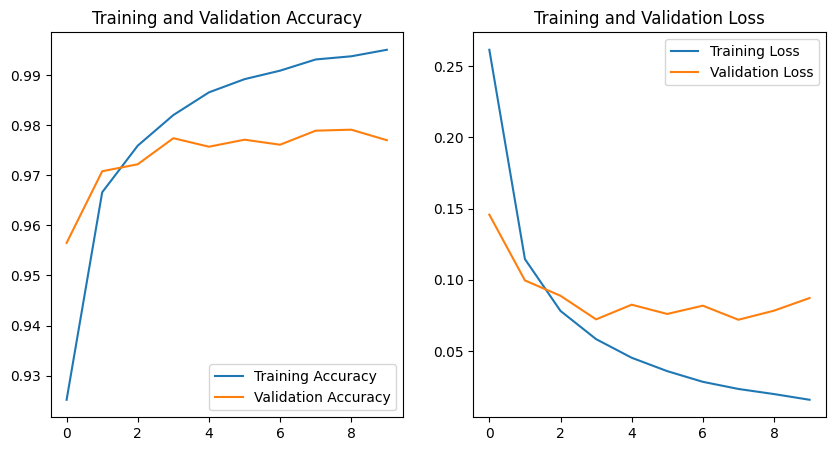

In [18]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
